# 分散分析 お試しver.

### 分散分析

ソース１：https://datacoach.me/series/statistics/r-anova/ <br>
ソース２：http://mizumot.com/handbook/?page_id=219

## 分散分析 ソース１

'data.frame':	72 obs. of  2 variables:
 $ count: num  10 7 20 14 14 12 10 23 17 20 ...
 $ spray: Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...


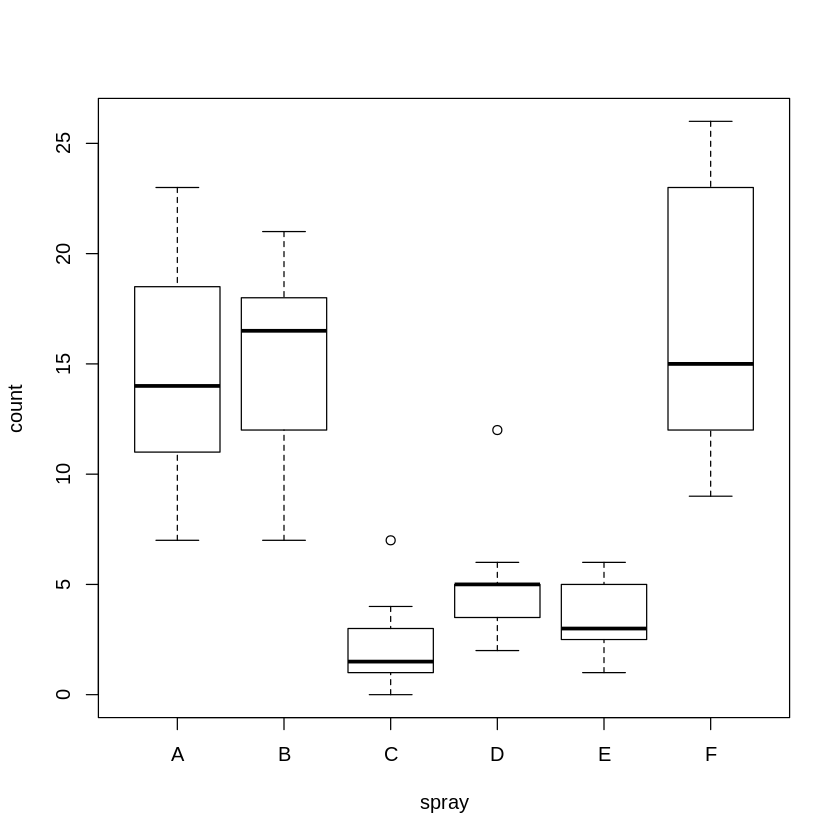

In [11]:
data("InsectSprays")
str(InsectSprays)
plot(count ~ spray, data = InsectSprays)
#boxplot(InsectSprays[,1]~InsectSprays[,2])

In [14]:
InsectSprays

count,spray
<dbl>,<fct>
10,A
7,A
20,A
14,A
14,A
12,A
10,A
23,A
17,A


In [12]:
#一元配置分散分析
summary(aov(count~spray,data=InsectSprays))

            Df Sum Sq Mean Sq F value Pr(>F)    
spray        5   2669   533.8    34.7 <2e-16 ***
Residuals   66   1015    15.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [13]:
#bartlett.test(InsectSprays$count, InsectSprays$spray)
bartlett.test(count ~ spray, data = InsectSprays)


	Bartlett test of homogeneity of variances

data:  count by spray
Bartlett's K-squared = 25.96, df = 5, p-value = 9.085e-05


## 分散分析 ソース２

In [3]:
dat <- read.csv("input/ch06one-way.csv", header=TRUE, fileEncoding="CP932")

In [2]:
dat

Class,Score
<int>,<int>
1,76
1,54
1,62
1,46
1,53
1,64
1,42
1,96
1,87


In [4]:
dat$Class <- factor(dat$Class)

In [5]:
table(dat$Class)                    # 各グループの人数確認
tapply(dat$Score, dat$Class, mean)  # 各グループの平均
tapply(dat$Score, dat$Class, sd)    # 各グループの標準偏差


 1  2  3 
29 29 29 

1        2        3 
60.79310 64.06897 68.41379

1        2        3 
21.47154 20.39771 21.29808

In [ ]:
install.packages("psych")

In [7]:
# psychパッケージを利用する場合
library(psych)
describe.by(dat$Score, list(dat$Class))

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“describe.by is deprecated.  Please use the describeBy function”



 Descriptive statistics by group 
: 1
   vars  n  mean    sd median trimmed   mad min max range skew kurtosis   se
X1    1 29 60.79 21.47     56   60.44 20.76  29  97    68 0.28    -1.23 3.99
------------------------------------------------------------ 
: 2
   vars  n  mean   sd median trimmed   mad min max range  skew kurtosis   se
X1    1 29 64.07 20.4     64   64.28 26.69  29  95    66 -0.02    -1.39 3.79
------------------------------------------------------------ 
: 3
   vars  n  mean   sd median trimmed   mad min max range  skew kurtosis   se
X1    1 29 68.41 21.3     67   68.88 26.69  30  99    69 -0.19    -1.38 3.95

In [10]:
TukeyHSD(aov(Score~Class, data=dat))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Score ~ Class, data = dat)

$Class
        diff       lwr      upr     p adj
2-1 3.275862 -9.920631 16.47235 0.8246325
3-1 7.620690 -5.575803 20.81718 0.3570632
3-2 4.344828 -8.851665 17.54132 0.7129033
